### Imports

In [1]:
from ansatz_optimizer_1D import *
import os

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
from pennylane import numpy as np
import h5py
import pennylane as qml
import random
import time
import csv

In [3]:
import setGPU
import itertools

setGPU: Setting GPU to: 1


### Gathering 1D Data

In [32]:
name = '../optimizer_data/1D_run2/fitnesses_1d.csv'
values = pd.read_csv(name)

In [33]:
values = values.transpose()

In [34]:
values

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
circuit 1,0.963592,0.963592,0.991164,0.991164,0.991164,0.991164,0.991164,0.991164,0.991164,0.991164,...,0.991164,0.991164,0.991164,0.991164,0.991164,0.991164,0.991164,0.991164,0.991164,0.991164
circuit 2,0.961806,0.962505,0.989317,0.990122,0.990277,0.990277,0.990277,0.990277,0.990277,0.990277,...,0.990277,0.990277,0.990277,0.990277,0.990277,0.990277,0.990277,0.990277,0.990277,0.990277
circuit 3,0.946238,0.961806,0.989182,0.990027,0.990122,0.990122,0.990122,0.990122,0.990122,0.990122,...,0.990122,0.990122,0.990122,0.990122,0.990122,0.990122,0.990122,0.990122,0.990122,0.990122
circuit 4,0.786945,0.961068,0.963592,0.989317,0.990027,0.990027,0.990027,0.990027,0.990027,0.990027,...,0.990027,0.990027,0.990027,0.990027,0.990027,0.990027,0.990027,0.990027,0.990027,0.990027
circuit 5,0.766571,0.955104,0.962597,0.989182,0.989587,0.989587,0.989587,0.989587,0.989587,0.989587,...,0.989587,0.989587,0.989587,0.989587,0.989587,0.989587,0.989587,0.989587,0.989587,0.989587
circuit 6,0.765656,0.946345,0.962505,0.963592,0.989317,0.989317,0.989317,0.989317,0.989317,0.989317,...,0.989317,0.989317,0.989317,0.989317,0.989317,0.989317,0.989317,0.989317,0.989317,0.989317
circuit 7,0.667174,0.946238,0.961806,0.962597,0.989232,0.989232,0.989232,0.989232,0.989232,0.989232,...,0.989232,0.989232,0.989232,0.989232,0.989232,0.989232,0.989232,0.989232,0.989232,0.989232
circuit 8,0.623548,0.786945,0.961317,0.962505,0.989182,0.989182,0.989182,0.989182,0.989182,0.989182,...,0.989182,0.989182,0.989182,0.989182,0.989182,0.989182,0.989182,0.989182,0.989182,0.989182
circuit 9,0.623337,0.786552,0.961068,0.961859,0.963592,0.963592,0.963592,0.963592,0.963592,0.963592,...,0.963592,0.963592,0.963592,0.963592,0.963592,0.963592,0.963592,0.963592,0.963592,0.963592
circuit 10,0.610087,0.766571,0.960136,0.961806,0.962597,0.962597,0.962597,0.962597,0.962597,0.962597,...,0.963009,0.963009,0.963009,0.963009,0.963009,0.963009,0.963009,0.963009,0.963009,0.963009


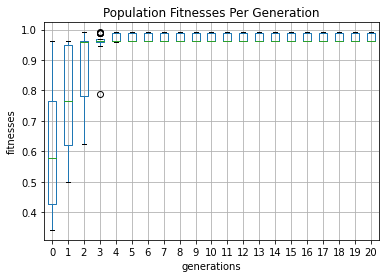

In [36]:
boxplot = values.boxplot() 
boxplot.set_ylabel('fitnesses')
boxplot.set_xlabel('generations')
plt.title("Population Fitnesses Per Generation")
plt.savefig('../optimizer_data/1D_run2/fitnesses.png', bbox_inches='tight')

### File Reading

In [4]:
jet_filename = '../jetImage_0_30p_0_10000.h5'
f1 = h5py.File(jet_filename,'r')
jets = np.array(f1["jets"])

In [5]:
j_pt = jets[:, 1]
j_eta = jets[:, 2]
j_mass = jets[:, 3]

In [6]:
num_bins = 16

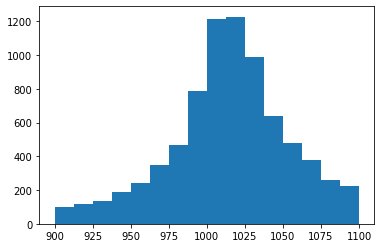

In [7]:
min_pt = 900
max_pt = 1100
distribution_pt, bins_pt_edge, __ = plt.hist(j_pt, range=[min_pt, max_pt], bins=num_bins)
probability_pt = distribution_pt / np.sum(distribution_pt)
bins_pt = np.asarray([(bins_pt_edge[i] + bins_pt_edge[i+1])/2. for i in range(len(bins_pt_edge)-1)])

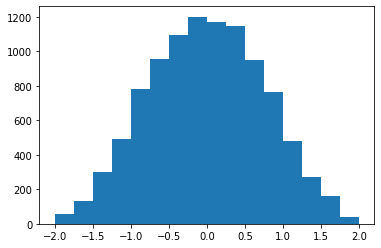

In [8]:
min_eta = -2
max_eta = 2
distribution_eta, bins_eta_edge, __ =plt.hist(j_eta, range=[min_eta, max_eta], bins=num_bins)
probability_eta = distribution_eta / np.sum(distribution_eta)
bins_eta = np.asarray([(bins_eta_edge[i] + bins_eta_edge[i+1])/2. for i in range(len(bins_eta_edge)-1)])

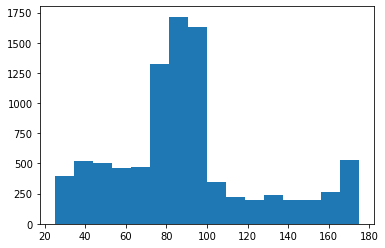

In [9]:
min_mass = 25
max_mass = 175
distribution_mass, bins_mass_edge, __ =plt.hist(j_mass, range=[min_mass, max_mass],bins=num_bins)
probability_mass = distribution_mass / np.sum(distribution_mass)
bins_mass = np.asarray([(bins_mass_edge[i] + bins_mass_edge[i+1])/2. for i in range(len(bins_mass_edge)-1)])

### Testing Ansatz Optimizer - 1D

In [10]:
num_one_gates = 3
num_two_gates = 1
max_moments = 4
n_qubits = 4
pop_size = 20

#### Testing

In [56]:
tensor = [[[1, 0, 0, 0, 0],
  [0, 1, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0]],
 [[0, 1, 0, 0, 0],
  [0, 0, 0, 0, 3],
  [0, 0, 0, 2, 0],
  [0, 1, 0, 0, 0]],
 [[0, 1, 0, 0, 0],
  [0, 1, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [0, 0, 1, 0, 0]],
 [[0, 0, 1, 0, 0],
  [0, 0, 0, 0, 3],
  [0, 0, 0, 2, 0],
  [0, 1, 0, 0, 0]],
 [[0, 1, 0, 0, 0],
  [0, 1, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [0, 0, 1, 0, 0]],
 [[0, 0, 1, 0, 0],
  [0, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [0, 0, 0, 0, 0]]]

In [12]:
circuit = IndividualCircuit(tensor, probability_pt, num_one_gates, num_two_gates, 4, 1)

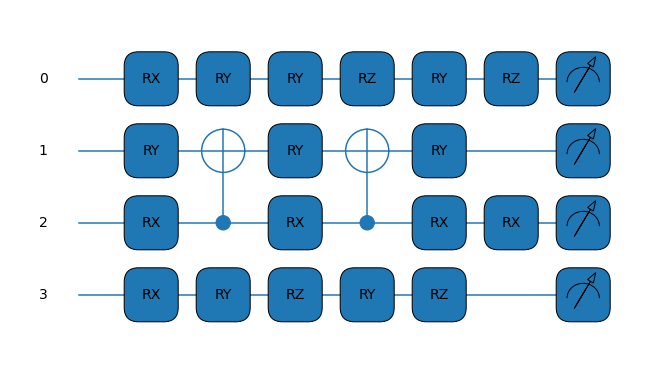

In [13]:
circuit.draw()

In [14]:
circuit.train_fitness()

In [15]:
circuit.get_fitness()

tensor(0.96275437, requires_grad=True)

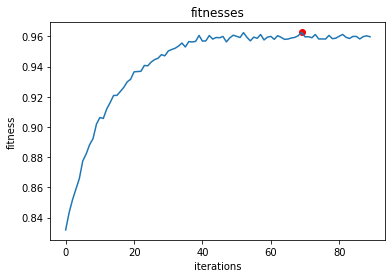

In [16]:
circuit.plot_fitness()

#### Processing

In [11]:
opt = CircuitOptimizer(pop_size, probability_pt, num_one_gates, num_two_gates, max_moments, n_qubits)

/usr/local/lib/python3.8/site-packages/autograd/tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


Execution time multiprocessing 103.00111413002014
Generation: 0 Fittest: 0.967325795912825


In [12]:
opt.population.get_fittest_fitness()

tensor(0.9673258, requires_grad=True)

In [13]:
opt.population.fittest.fitness

tensor(0.9673258, requires_grad=True)

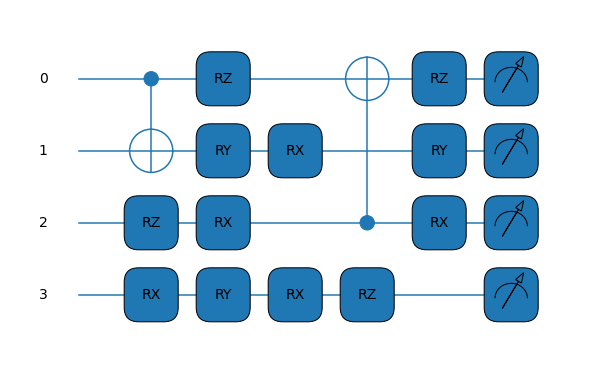

In [14]:
opt.population.fittest.draw()

In [30]:
plot_distribution()
draw_circuits()
plot_fitnesses()
plot_losses()

In [32]:
opt.generation += 1
opt.selection()
opt.crossover()
    
for i in range(4):
    if random.random() < 0.7:
        opt.mutate()
            
opt.train_offsprings()
draw_and_save_offsprings()
opt.add_offsprings()
plot_distribution()
plot_fitnesses()
plot_losses()
draw_circuits()
opt.print_info()

Execution time multiprocessing 87.40743112564087
Generation: 2 Fittest: 0.9904863885081167


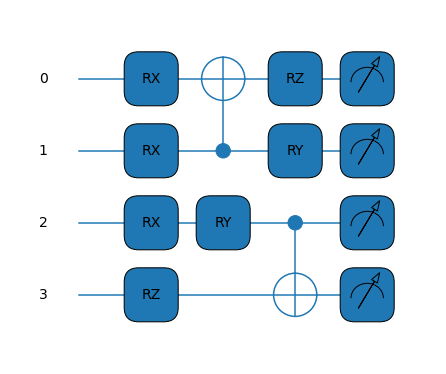

In [58]:
opt.population.fittest.draw()

In [17]:
folder_name = '../optimizer_data/1D_test/'

In [18]:
header = []
for i in range(pop_size):
    header.append("circuit " + str(i+1))
print(header)

['circuit 1', 'circuit 2', 'circuit 3', 'circuit 4', 'circuit 5', 'circuit 6', 'circuit 7', 'circuit 8', 'circuit 9', 'circuit 10', 'circuit 11', 'circuit 12', 'circuit 13', 'circuit 14', 'circuit 15', 'circuit 16', 'circuit 17', 'circuit 18', 'circuit 19', 'circuit 20']


In [19]:
with open(folder_name + 'fitnesses_1d.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    
    fitnesses = []
    
    for circuit in opt.population.individuals:
        fitnesses.append(circuit.get_fitness())
    writer.writerow(fitnesses)

In [20]:
fitnesses

[tensor(0.9673258, requires_grad=True),
 tensor(0.95533825, requires_grad=True),
 tensor(0.94067569, requires_grad=True),
 tensor(0.93620197, requires_grad=True),
 tensor(0.93421341, requires_grad=True),
 tensor(0.82947997, requires_grad=True),
 tensor(0.77744992, requires_grad=True),
 tensor(0.76756296, requires_grad=True),
 tensor(0.76554669, requires_grad=True),
 tensor(0.76456253, requires_grad=True),
 tensor(0.75192071, requires_grad=True),
 tensor(0.66722686, requires_grad=True),
 tensor(0.61017731, requires_grad=True),
 tensor(0.54816309, requires_grad=True),
 tensor(0.49873449, requires_grad=True),
 tensor(0.47440839, requires_grad=True),
 tensor(0.37107697, requires_grad=True),
 tensor(0.37107697, requires_grad=True),
 tensor(0.34154762, requires_grad=True),
 0.3415476189279736]

In [21]:
distributions_folder_name = folder_name + 'distributions_1D_fixedLR/generation_'

In [ ]:
# with open(folder_name + 'fitnesses_1d.csv', 'r') as f:
#     heading = next(f)
#     reader = csv.reader(f)
#     row1 = next(reader)
    

In [20]:
# plt.title("generation 0")
# plt.xlabel('fitness values')
# plt.ylabel('quantity')
# plt.hist(fitnesses, range=[0.0, 1.0], bins=10, rwidth=0.95)
# plt.savefig(distributions_folder_name + '0.png', bbox_inches='tight')
# plt.close()

In [22]:
def plot_distribution():
    with open(folder_name + 'fitnesses_1d.csv', 'a') as f:
        writer = csv.writer(f)

        fitnesses = []

        for circuit in opt.population.individuals:
            fitnesses.append(circuit.get_fitness())
        writer.writerow(fitnesses)
        
    plt.title("generation " + str(opt.generation))
    plt.xlabel('fitness values')
    plt.ylabel('quantity')
    plt.hist(fitnesses, range=[0.0, 1.0], bins=10, rwidth=0.95)
    plt.savefig(distributions_folder_name + str(opt.generation) + '.png', bbox_inches='tight')
    plt.close()

In [23]:
fitnesses_folder_name = folder_name + 'plots_and_circuits/generation_'
losses_folder_name = folder_name + 'plots_and_circuits/generation_'
circuits_folder_name = folder_name + 'plots_and_circuits/generation_'

In [24]:
def plot_fitnesses():
    for i in range(len(opt.population.individuals)):
        plt.title("generation " + str(opt.generation) + " circuit " + str(i+1) + " fitness: " + str(opt.population.individuals[i].get_fitness()))
        plt.plot(opt.population.individuals[i].fitnesses)
        plt.xlabel('iterations')
        plt.ylabel('fitnesses')
        directory1 = fitnesses_folder_name + str(opt.generation)
        if not os.path.exists(directory1):
            os.makedirs(directory1)
        plt.scatter(opt.population.individuals[i].best_loss_idx, opt.population.individuals[i].fitnesses[opt.population.individuals[i].best_loss_idx],c='r')
        plt.savefig(directory1 + '/circuit_' + str(i+1) +'_fitness.png', bbox_inches='tight')
        plt.cla()
        plt.close("all")

In [25]:
def plot_losses():
    for i in range(len(opt.population.individuals)):
        plt.title("generation " + str(opt.generation) + " circuit " + str(i+1) + " losses: " + str(opt.population.individuals[i].losses[opt.population.individuals[i].best_loss_idx]))
        plt.plot(opt.population.individuals[i].losses)
        plt.xlabel('iterations')
        plt.ylabel('losses')
        directory1 = losses_folder_name + str(opt.generation)
        if not os.path.exists(directory1):
            os.makedirs(directory1)
        plt.scatter(opt.population.individuals[i].best_loss_idx, opt.population.individuals[i].losses[opt.population.individuals[i].best_loss_idx],c='r')
        plt.savefig(directory1 + '/circuit_' + str(i+1) +'_losses.png', bbox_inches='tight')
        plt.cla()
        plt.close("all")


In [26]:
def draw_circuits(): 
    for i in range(len(opt.population.individuals)):
        circuit = opt.population.individuals[i]
        fig, ax = qml.draw_mpl(convert_tensor_to_circuit)(circuit.tensor, circuit.params, circuit.n_qubits, circuit.num_one_gates, circuit.num_two_gates)
        title = "generation " + str(opt.generation) +  " circuit " + str(i+1) + " fitness: " + str(circuit.get_fitness())
        ax.set_title(title)
        directory2 = circuits_folder_name + str(opt.generation)
        if not os.path.exists(directory2):
            os.makedirs(directory2)
        fig.savefig( directory2+ '/circuit_' + str(i+1) +'_circuit.png', bbox_inches='tight')
        plt.close("all")

In [27]:
offsprings_folder_name = folder_name+'offsprings_1D_fixedLR/generation_'

In [28]:
def draw_and_save_offsprings():
    for i in range(len(opt.offsprings.individuals)):
        title = "offspring " + str(i+1) + " generation " + str(opt.generation) + " fitness: " + str(opt.offsprings.individuals[i].get_fitness())
        circuit = opt.offsprings.individuals[i]
        fig, ax = qml.draw_mpl(convert_tensor_to_circuit)(circuit.tensor, circuit.params, circuit.n_qubits, circuit.num_one_gates, circuit.num_two_gates)
        ax.set_title(title)
        directory = offsprings_folder_name + str(opt.generation)
        if not os.path.exists(directory):
            os.makedirs(directory)
        fig.savefig(directory + '/offspring_' + str(i+1) +'.png', bbox_inches='tight')
        plt.close("all")
        

In [29]:
import setGPU

In [47]:
# plot_distribution()
draw_circuits()
plot_fitnesses()
plot_losses()

In [32]:
pop_size = 20
# opt = CircuitOptimizer(pop_size, probability_pt, num_one_gates, num_two_gates, max_moments, n_qubits)
prior_fittest = opt.population.fittest
prior_fitness = opt.population.fittest.get_fitness()

for i in range(5):
    opt.generation += 1
    opt.selection()
    opt.crossover()
    
    for i in range(4):
        if random.random() < 0.7:
            opt.mutate()
            
    opt.train_offsprings()
    draw_and_save_offsprings()
    opt.add_offsprings()
    plot_distribution()
    plot_fitnesses()
    plot_losses()
    draw_circuits()
    opt.print_info()
    
    curr_max_fit = opt.population.fittest
    curr_max_fitness = opt.population.fittest.get_fitness()
    if curr_max_fitness == prior_fitness and not curr_max_fit.tensor == prior_fittest.tensor:
        break
    else:
        prior_fittest = curr_max_fit
        prior_fitness = curr_max_fitness

Execution time multiprocessing 142.6723189353943
Generation: 0 Fittest: 0.9685555420179918
Execution time multiprocessing 50.62537860870361
Generation: 1 Fittest: 0.9685555420179918
Execution time multiprocessing 64.42996788024902
Generation: 2 Fittest: 0.9685555420179918


KeyboardInterrupt: 

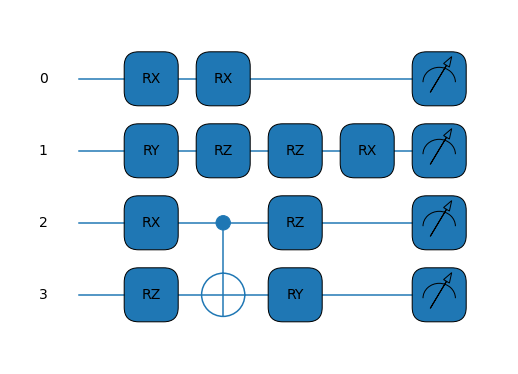

In [34]:
prior_fittest.draw()

In [36]:
prior_fittest.fitness

tensor(0.96855554, requires_grad=True)

In [28]:
for i in range(10):
    opt.generation += 1
    opt.selection()
    opt.crossover()
    
    for i in range(4):
        if random.random() < 0.7:
            opt.mutate()
    
    opt.train_offsprings()
    draw_and_save_offsprings()
    opt.add_offsprings()
    plot_distribution()
    plot_fitnesses()
    plot_losses()
    draw_circuits()
    opt.print_info()
    

Execution time multiprocessing 73.73105645179749
Generation: 1 Fittest: 0.9981829592824661


KeyboardInterrupt: 

In [29]:
opt.generation

2

In [45]:
opt.population.individuals[1].tensor

[[[0, 0, 1, 0, 0], [0, 0, 0, 4, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 2]],
 [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 1, 0, 0, 0]],
 [[0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0]],
 [[0, 0, 0, 0, 0], [0, 0, 0, 3, 0], [0, 0, 0, 0, 2], [0, 0, 1, 0, 0]]]

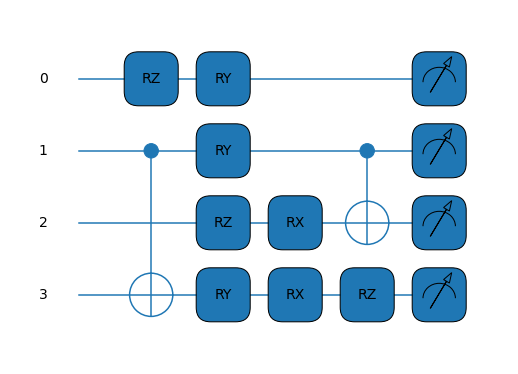

In [46]:
opt.population.individuals[1].draw()

In [47]:
opt.population.individuals[1].train_fitness()

In [48]:
opt.population.individuals[1].get_fitness()

tensor(0.99027689, requires_grad=True)

#### Result Processing 

In [60]:
circuit = opt.population.individuals[0]
sampling1 = convert_tensor_to_circuit(circuit.tensor, circuit.params, circuit.n_qubits, circuit.num_one_gates, circuit.num_two_gates,  prob=False)
states_mapping = [int(np.sum(np.asarray(s)*np.asarray([1,2,4,8]))) for s in list(itertools.product([0,1],repeat=4))]

In [61]:
def state_to_bin(state):
    #provided qubit state, returns the bin# it corresponds to
    return states_mapping.index(np.sum(np.asarray(state)*np.asarray([1,2,4,8])))
def qubits_to_var(sample, bins):
    return bins[state_to_bin(sample)]
def qubits_to_pt(sample):
    return qubits_to_var(sample, bins_pt)
def qubits_to_eta(sample):
    return qubits_to_var(sample, bins_eta)

In [62]:
sampling1

tensor([[0, 1, 1, 0],
        [1, 1, 0, 1],
        [1, 1, 1, 0],
        ...,
        [1, 1, 0, 0],
        [1, 1, 1, 0],
        [1, 1, 1, 0]], requires_grad=True)

In [63]:
sampling1_pt = np.apply_along_axis( qubits_to_pt, 1, sampling1[0,:,:])

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
generated1_df = pd.DataFrame(sampling1_pt, columns=['jet_pt'])

### Testing Optimizer - 2D with j_pt and j_eta

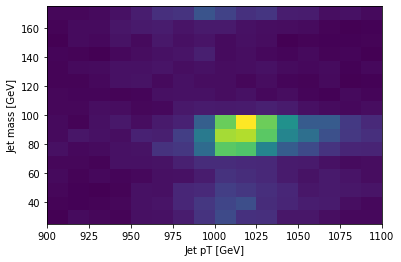

In [18]:
# plt.figure(figsize=(12,5))
# plt.subplot(121)
# target_2d, bins_pt_edge, bins_eta_edge, _ = plt.hist2d(j_pt, j_eta, bins=[16,16], range=[[min_pt, max_pt],[min_eta, max_eta]])
# plt.suptitle("Target")
# plt.xlabel('Jet pT [GeV]')
# plt.ylabel('Jet eta')
# bins_pt = np.asarray([(bins_pt_edge[i] + bins_pt_edge[i+1])/2. for i in range(len(bins_pt_edge)-1)])
# bins_eta = np.asarray([(bins_eta_edge[i] + bins_eta_edge[i+1])/2. for i in range(len(bins_eta_edge)-1)])
# bins_pt_eta=list(itertools.product(bins_pt,bins_eta))
# plt.subplot(122)
target_2d, bins_pt_edge, bins_mass_edge, _ = plt.hist2d(j_pt, j_mass, bins=[16,16], range=[[min_pt, max_pt],[min_mass, max_mass]])
plt.xlabel('Jet pT [GeV]')
plt.ylabel('Jet mass [GeV]')
plt.show()
bins_pt = np.asarray([(bins_pt_edge[i] + bins_pt_edge[i+1])/2. for i in range(len(bins_pt_edge)-1)])
bins_mass = np.asarray([(bins_mass_edge[i] + bins_mass_edge[i+1])/2. for i in range(len(bins_mass_edge)-1)])
bins_pt_mass=list(itertools.product(bins_pt,bins_mass))
plt.show()

In [12]:
target_2d = target_2d / np.sum(target_2d)
target_1d = np.ravel(target_2d)

In [13]:
num_one_gates2 = 3
num_two_gates2 = 1
max_moments2 = 6
n_qubits2 = 8
pop_size2 = 40

In [14]:
opt2 = CircuitOptimizer(pop_size2, target_1d, num_one_gates2, num_two_gates2, max_moments2, n_qubits2)

/usr/local/lib/python3.8/site-packages/autograd/tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


Execution time multiprocessing 15.876953601837158
Generation: 0 Fittest: 0.7843331051987251
